# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1 da Linguagem Python em 05/06/2017 ******

### Nosso objetivo aqui é apressentar um exemplo de classificação de imagens em Pyhon. Para isso, usaremos dois conjuntos de dados de treino e de teste, conforme especificação abaixo. Esses conjuntos de dados podem os valores binários de dígitos desenhados à mão e nossa tarefa será criar um modelo que reconheça estes dígitos.

Os arquivos de dados train.csv e test.csv contém imagens em escala de cinza, de dígitos desenhados à mão, de zero a nove. Cada imagem é de 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total. Cada pixel tem um pixel de valor único associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais elevados significam mais escura. Este valor de pixel é um número inteiro entre 0 e 255, inclusive. O conjunto de dados de treinamento, (train.csv), tem 785 colunas. A primeira coluna, chamado "marcador", é o dígito que foi desenhado pelo usuário. O restante das colunas contêm os valores de pixel da imagem associada.

Os datasets podem ser encontrados alternativamente em: 

http://datascienceacademy.com.br/blog/aluno/PythonFundamentos/

In [1]:
# Importando pacotes e definindo parâmetros
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Criando a função para carregar o arquivo csv para um array numpy
def load_data(data_dir):
    train_data = open(data_dir + "train.csv").read()
    train_data = train_data.split("\n")[1:-1]
    train_data = [i.split(",") for i in train_data]
    
    # print(len(train_data))
    X_train = np.array([[int(i[j]) for j in range(1,len(i))] for i in train_data])
    y_train = np.array([int(i[0]) for i in train_data])

    # print(X_train.shape, y_train.shape)
    test_data = open(data_dir + "test.csv").read()
    test_data = test_data.split("\n")[1:-1]
    test_data = [i.split(",") for i in test_data]
    
    # print(len(test_data))
    X_test = np.array([[int(i[j]) for j in range(0,len(i))] for i in test_data])

    # print(X_test.shape)
    return X_train, y_train, X_test

In [3]:
# Criando uma classe
class simple_knn():
    "a simple kNN with L2 distance"

    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            k_closest_y = []
            labels = self.y_train[np.argsort(dists[i,:])].flatten()
            
            # Encontrando os labels mais próximos
            k_closest_y = labels[:k]

            c = Counter(k_closest_y)
            y_pred[i] = c.most_common(1)[0][0]

        return(y_pred)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]

        dot_pro = np.dot(X, self.X_train.T)
        sum_square_test = np.square(X).sum(axis = 1)
        sum_square_train = np.square(self.X_train).sum(axis = 1)
        dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)

        return(dists)

In [19]:
# Carregando os arquivos csv nas variáveis de treino e de teste
# Executa em alguns segundos
data_dir = "./"
X_train, y_train, X_test = load_data(data_dir)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([1, 0, 1, ..., 7, 6, 9]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]))


In [10]:
# Imprimindo as variáveis
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


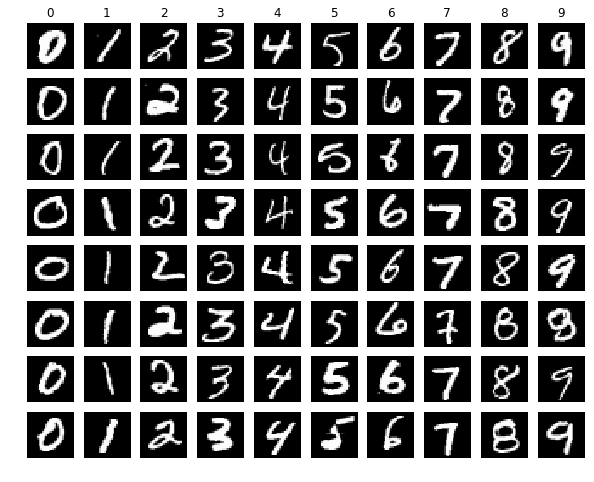

In [11]:
# Distribui as imagens dos dígitos randomicamente através do dataset de treino
# Executa em alguns segundos
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(classes)
samples = 8

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], samples, replace = False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

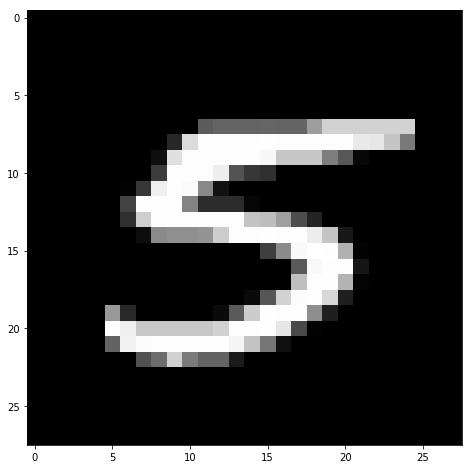

In [12]:
# Visualizando uma imagem de teste, reconhecida pelo modelo
plt.imshow(X_test[2311].reshape((28, 28)))

In [13]:
# Fazendo previsões para as imagens de teste, usando classificador kNN
batch_size = 2000

k = 1
classifier = simple_knn()
classifier.train(X_train, y_train)

In [14]:
# Processando o modelo preditivo na primeira metade do dataset de teste
# Executa em alguns minutos, dependendo da velocidade do computador

predictions = []

for i in range(int(len(X_test)/(2*batch_size))):
    print("Processando " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)
    
    print("Processamento concluído em " + str(toc-tic) + " segundos.")

print("Análise preditiva concluída!")

Processando 1/14...
Processamento concluído em 45.09993767738342 segundos.
Processando 2/14...
Processamento concluído em 46.33511233329773 segundos.
Processando 3/14...
Processamento concluído em 45.2710382938385 segundos.
Processando 4/14...
Processamento concluído em 45.141417503356934 segundos.
Processando 5/14...
Processamento concluído em 45.25050234794617 segundos.
Processando 6/14...
Processamento concluído em 44.92230486869812 segundos.
Processando 7/14...
Processamento concluído em 45.371819734573364 segundos.
Análise preditiva concluída!


In [20]:
# Processando o modelo preditivo na segunda metade do dataset de teste
# Executa em alguns minutos, dependendo da velocidade do computador

for i in range(int(len(X_test)/(2*batch_size)), int(len(X_test)/batch_size)):
    print("Processando " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)

    print("Processamento concluído em " + str(toc-tic) + " Secs.")

print("Análise preditiva concluída!")

Processando 8/14...
Processamento concluído em 46.81738638877869 Secs.
Processando 9/14...
Processamento concluído em 48.16947674751282 Secs.
Processando 10/14...
Processamento concluído em 46.952264070510864 Secs.
Processando 11/14...
Processamento concluído em 47.603355884552 Secs.
Processando 12/14...
Processamento concluído em 48.3222975730896 Secs.
Processando 13/14...
Processamento concluído em 47.83902645111084 Secs.
Processando 14/14...
Processamento concluído em 46.96511888504028 Secs.
Análise preditiva concluída!


In [21]:
# Grava o resultado da predição em um arquivo csv

out_file = open("previsoes.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()

# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>